In [1]:
from PIL import Image, ImageOps
import numpy as np
import os
from skimage.transform import rotate
import matplotlib.pyplot as plt
import pandas as pd 
from tqdm import tqdm 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

seed=2024
np.random.seed(seed)

prefix="7C"

In [2]:
def horizontal_flip(image):
    return ImageOps.mirror(image)

def vertical_flip(image):
    return ImageOps.flip(image)

def rotation(image, degree):
    return rotate(np.array(image), degree, mode="reflect")

In [3]:
df = pd.read_csv('../../data/dataframes/all_patchs_dataframe.csv')
df=df.sort_values(by=['Patient'])
df["classe"].value_counts()

classe
Réactionnel             6019
Fibrose                 2311
Solide                  1822
Normal                  1746
Nécrose                 1538
Lépidique               1365
Glandulaire complexe    1335
Papillaire              1150
Acinaire                1132
Mucineux                 822
Hémorragique             685
Foetal                   485
Tissu lymphoïde          471
Micropapillaire          426
Name: count, dtype: int64

In [4]:
df["classe"].value_counts().index

Index(['Réactionnel', 'Fibrose', 'Solide', 'Normal', 'Nécrose', 'Lépidique',
       'Glandulaire complexe', 'Papillaire', 'Acinaire', 'Mucineux',
       'Hémorragique', 'Foetal', 'Tissu lymphoïde', 'Micropapillaire'],
      dtype='object', name='classe')

In [5]:
im_path = "../../data/normalized_data"
save_path = "../../data/augmented_data"

classes = df["classe"].unique()
for c in classes :
    print(c)
    path1 = im_path+'/'+c
    path2 = save_path+'/'+c
    if not os.path.exists(path2): os.mkdir(path2)    
    for file in tqdm(os.listdir(path1)) :
        img = Image.open(path1 + "/"+ file).convert('RGB')
        if c in ['Hémorragique','Tissu lymphoïde']:
            for deg in [45, 90, 135, 225, 270, 315]:
                if os.path.exists(path2+"/"+file.split('.')[0]+'_rot'+str(deg)+".jpg")==False:
                    plt.imsave(path2+"/"+file.split('.')[0]+'_rot'+str(deg)+".jpg",rotation(img, deg))
        elif c in ['Fibrose', 'Nécrose']:
            for deg in [45, 135, 270]:
                if os.path.exists(path2+"/"+file.split('.')[0]+'_rot'+str(deg)+".jpg")==False:
                    plt.imsave(path2+"/"+file.split('.')[0]+'_rot'+str(deg)+".jpg",rotation(img, deg))
        elif c in ['Foetal', 'micropapillaire']:
            for deg in [45, 90]:
                if os.path.exists(path2+"/"+file.split('.')[0]+'_rot'+str(deg)+".jpg")==False:
                    plt.imsave(path2+"/"+file.split('.')[0]+'_rot'+str(deg)+".jpg",rotation(img, deg))
        if os.path.exists(path2+"/"+file.split('.')[0]+"_HF.jpg")==False:
            horizontal_flip(img).save(path2+"/"+file.split('.')[0]+"_HF.jpg")
        if os.path.exists(path2+"/"+file.split('.')[0]+"_VF.jpg")==False:
            vertical_flip(img).save(path2+"/"+file.split('.')[0]+"_VF.jpg")
        if os.path.exists(path2+"/"+file)==False:
            img.save(path2+"/"+file)

Fibrose


100%|██████████| 2311/2311 [00:14<00:00, 159.05it/s]


Papillaire


100%|██████████| 1150/1150 [00:05<00:00, 201.84it/s]


Acinaire


100%|██████████| 1132/1132 [00:05<00:00, 191.54it/s]


Lépidique


100%|██████████| 1366/1366 [00:06<00:00, 208.89it/s]


Glandulaire complexe


100%|██████████| 1335/1335 [00:06<00:00, 202.39it/s]


Normal


100%|██████████| 1746/1746 [00:07<00:00, 228.98it/s]


Hémorragique


100%|██████████| 685/685 [00:03<00:00, 196.45it/s]


Tissu lymphoïde


100%|██████████| 472/472 [00:02<00:00, 189.31it/s]


Micropapillaire


100%|██████████| 426/426 [00:02<00:00, 205.10it/s]


Foetal


100%|██████████| 485/485 [00:02<00:00, 194.70it/s]


Réactionnel


100%|██████████| 6019/6019 [00:32<00:00, 183.62it/s]


Nécrose


100%|██████████| 1538/1538 [11:26<00:00,  2.24it/s]


Solide


100%|██████████| 1822/1822 [00:32<00:00, 55.61it/s]


Mucineux


100%|██████████| 822/822 [00:14<00:00, 57.92it/s]


In [6]:
data_path = "../../dataset/augmented_data"

classes = os.listdir(data_path)
classes.sort()
print(len(classes), classes)

14 ['Acinaire', 'Fibrose', 'Foetal', 'Glandulaire complexe', 'Hémorragique', 'Lépidique', 'Micropapillaire', 'Mucineux', 'Normal', 'Nécrose', 'Papillaire', 'Réactionnel', 'Solide', 'Tissu lymphoïde']


In [7]:
number_of_images = sum([len(os.listdir(data_path+'/'+c)) for c in classes])
df= pd.DataFrame(columns=['Patient','lame','patch','classe'], index=range(number_of_images))

i=0
for c in classes:
    path = data_path + '/' + c
    for image in os.listdir(path):
        if 'row' in image:
            df.iloc[i]=[image.split("_")[0], image.split("_")[1].split()[0], image, c]
        elif '(' in image and ')' in image:
            try :
                df.iloc[i]=[image.split("_")[1], image.split("_")[0], image, c]
            except:
                df.iloc[i]=[image.split("_")[1], image.split('_')[-1].split('(')[0],image, c]
        else:
            print(image)
        i+=1
        
df=df.dropna()    
df['Patient']=df['Patient'].astype(int)

L_16_B .jpg
L_16_B _HF.jpg
L_16_B _VF.jpg
TL_6_Z.jpg
TL_6_Z_HF.jpg
TL_6_Z_VF.jpg
TL_6_Z_rot270.jpg
TL_6_Z_rot225.jpg
TL_6_Z_rot45.jpg
TL_6_Z_rot315.jpg
TL_6_Z_rot135.jpg
TL_6_Z_rot90.jpg


In [8]:
df.to_csv('../../dataset/dataframes/all_patchs_dataframe_augmented.csv', index=False)

In [9]:
df_count=pd.DataFrame()
df_count['classe']=df['classe'].value_counts().index
df_count['count']=df['classe'].value_counts().values
df_count

,classe,count
0,Réactionnel,18057
1,Fibrose,13866
2,Nécrose,9228
3,Hémorragique,6165
4,Solide,5466
5,Normal,5238
6,Tissu lymphoïde,4239
7,Lépidique,4095
8,Glandulaire complexe,4005
9,Papillaire,3450


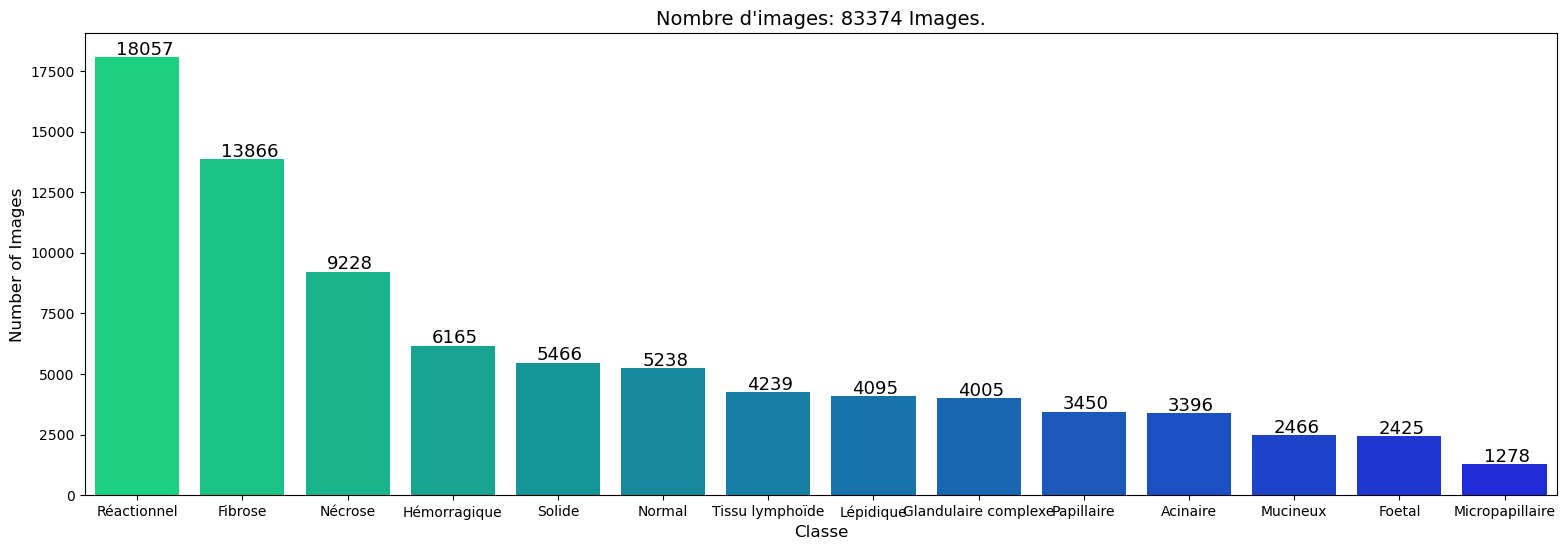

In [10]:
plt.figure(figsize=(19,6))
bar=sns.barplot(x=df_count['classe'], y=df_count["count"], palette='winter_r');
i=0
ticks=[]
ymin=0
ymax=np.max(df_count["count"])+1000
for p in bar.patches:
    x = p.get_xy()[0]
    height = p.get_height()+100
    width = p.get_width()/4
    label=str(list(df_count["count"])[i])#+'('+str(np.round(100*list(selected_df['img_count'])[i]/len(df),2))+'%'+')'
    plt.text(x+width, height, label, size=13);
    plt.ylim([ymin,ymax]);
    i+=1
plt.xlabel('Classe', fontsize=12);
plt.ylabel('Number of Images', fontsize=12);
plt.title("Nombre d'images: "+str(df_count["count"].values.sum())+' Images.', fontsize=14)
# plt.savefig('Statistiques des images_02_10.jpeg')
plt.show()

In [11]:
if prefix == "6C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'T', 'Acinaire':'T','Foetal':'T','Lépidique':'T','Mucineux':'T', 'Papillaire':'T',
                'Solide':'T', 'Glandulaire complexe':'T','Micropapillaire':'T'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'T':5}
elif prefix=="7C":
    all_classes={'Normal':'P', 'Réactionnel':'P', 'Hémorragique':'H', 'Nécrose':'Né', 'Tissu lymphoïde':'TL', 'Fibrose':'Fi',
                'Colloïde':'TuGr12', 'Acinaire':'TuGr12','Foetal':'TuGr12','Lépidique':'TuGr12','Mucineux':'TuGr12', 'Papillaire':'TuGr12',
                'Solide':'TuGr3', 'Glandulaire complexe':'TuGr3','Micropapillaire':'TuGr3'}
    idx_to_label = {'P':0, 'H':1, 'Né':2, 'TL':3, 'Fi':4, 'TuGr12':5, "TuGr3":6}
    
label_to_idx = {v:k for k,v in idx_to_label.items()}

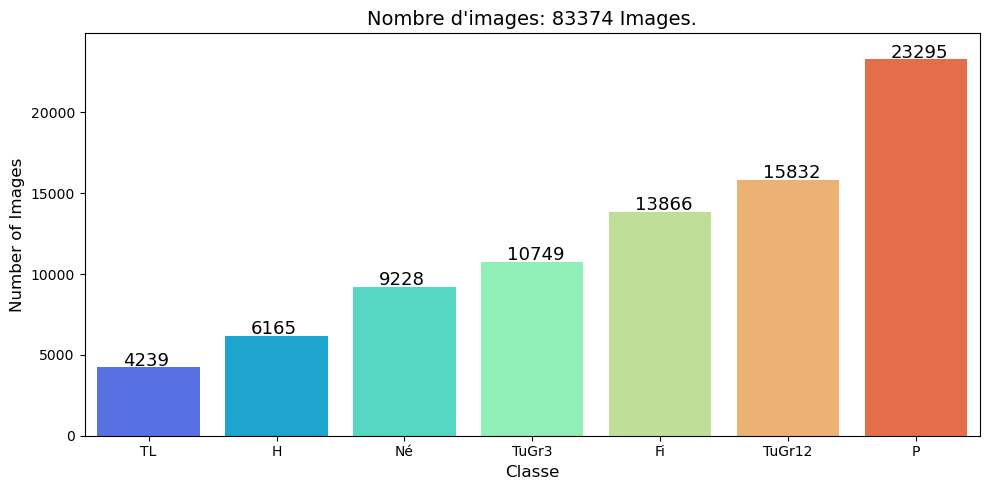

In [12]:
df['label']=df['classe'].apply(lambda x : all_classes[x]) 
df['label'] = df['label'].apply(lambda x: idx_to_label[x])

df_count=pd.DataFrame()
df_count['label']=df['label'].value_counts().index
df_count['count']=df['label'].value_counts().values
df_count['full label']=df_count['label'].apply(lambda x: label_to_idx[x])
df_count=df_count.sort_values(by='count')

plt.figure(figsize=(10,5))
bar=sns.barplot(x=df_count['full label'], y=df_count["count"], palette='rainbow');
i=0
ticks=[]
ymin=0
ymax=np.max(df_count["count"])+1600
for p in bar.patches:
    x = p.get_xy()[0]
    height = p.get_height()+100
    width = p.get_width()/4
    label=str(list(df_count["count"])[i])#+'('+str(np.round(100*list(selected_df['img_count'])[i]/len(df),2))+'%'+')'
    plt.text(x+width, height, label, size=13);
    plt.ylim([ymin,ymax]);
    i+=1
plt.xlabel('Classe', fontsize=12);
plt.ylabel('Number of Images', fontsize=12);
plt.title("Nombre d'images: "+str(df_count["count"].values.sum())+' Images.', fontsize=14)
plt.tight_layout()
plt.savefig(f'Statistiques des images_{prefix}_augmented.jpeg')
plt.show()

In [13]:
patients_test={2 : 'test', 4 : 'test',5 : 'test',14 : 'test', 17 : 'test',44 : 'train', 133: "test", 247 : 'test', 398 : 'test'}
patients_train={3 : 'train',
                6 : 'train',
                7 : 'train',
                9 : 'train',
                13 :  'train',
                16 : 'train',
                22 : 'train',
                23 : 'train',
                32 : "train" ,
                40 : 'train',
                58 : 'train',
                72 : 'train',
                114 : 'train',
                169 : 'train',
                192 : 'train',
                226 : "train",
                230 :'train',
                231 :'train',
                }

patients_to_dataset = {**patients_train, **patients_test}

print(len(patients_to_dataset), len(patients_train), len(patients_test))
df['dataset']=df['Patient'].apply(lambda x : patients_to_dataset[int(x)])

27 18 9


In [14]:
df['TetraClass']=df['label'].apply(lambda x: label_to_idx[x])
df=df.sort_values(by='label')
df

,Patient,lame,patch,classe,label,dataset,TetraClass
58139,398,R,R_398_A (1468)_HF.jpg,Réactionnel,0,test,P
58118,7,R,R_7_A (491)_VF.jpg,Réactionnel,0,train,P
58133,7,R,R_7_A (3464)_VF.jpg,Réactionnel,0,train,P
58132,7,R,R_7_A (177).jpg,Réactionnel,0,train,P
58131,7,R,R_7_A (3329)_VF.jpg,Réactionnel,0,train,P
...,...,...,...,...,...,...,...
76176,231,S,S_231_A (894)_HF.jpg,Solide,6,train,TuGr3
76257,231,S,S_231_A (1640)_VF.jpg,Solide,6,train,TuGr3
76258,231,S,S_231_A (176)_VF.jpg,Solide,6,train,TuGr3
76243,231,S,S_231_A (1659)_VF.jpg,Solide,6,train,TuGr3


In [15]:
train_path = f"../../dataset/dataframes/df_train_{prefix}_augmented.csv"
test_path = f"../../dataset/dataframes/df_test_{prefix}_augmented.csv"

dtrain= df.loc[df['dataset']=='train']
dtest = df.loc[df['dataset']=='test']

dtrain.to_csv(train_path, index=False)
dtest.to_csv(test_path, index=False)
print('train')
print(dtrain['label'].value_counts())

print("\ntest")
print(dtest['label'].value_counts())

train
label
0    17634
4    12390
6    10341
5     9964
2     8994
1     3960
3     3366
Name: count, dtype: int64

test
label
5    5868
0    5661
1    2205
4    1476
3     873
6     408
2     234
Name: count, dtype: int64


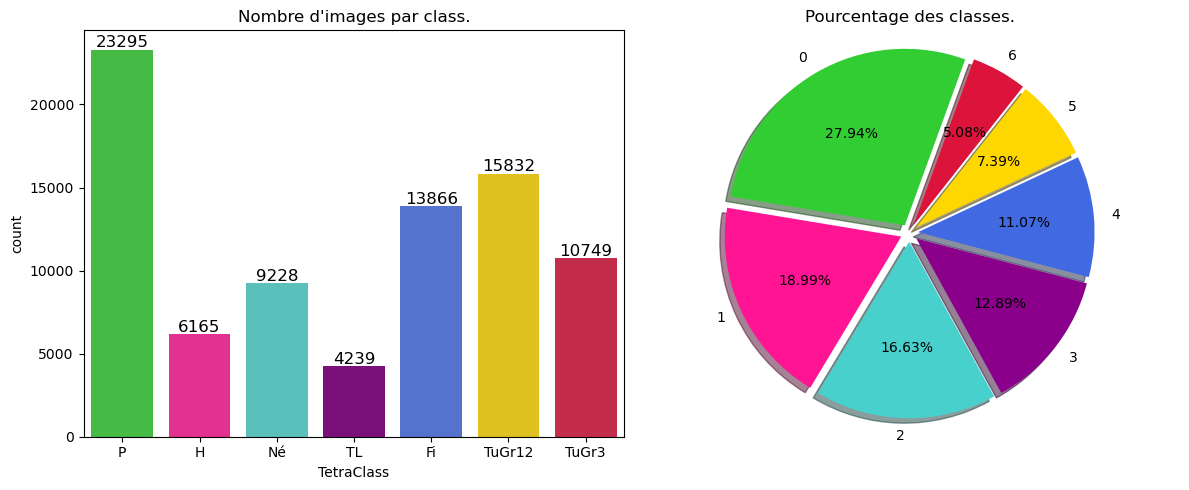

In [16]:
if prefix=="7C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'gold', 'crimson']
elif prefix=="6C": 
    colors=['limegreen', 'deeppink', 'mediumturquoise', 'darkmagenta', 'royalblue', 'crimson']
explode=tuple([0.05]*len(colors))
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df, x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Nombre d'images par class.")
plt.subplot(122)
sizes = [df["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, colors=colors, labels=list(idx_to_label.values()),  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('Pourcentage des classes.')
plt.tight_layout()
plt.savefig(f'Statistiques des images_{prefix}_augmented.jpeg')
plt.show()

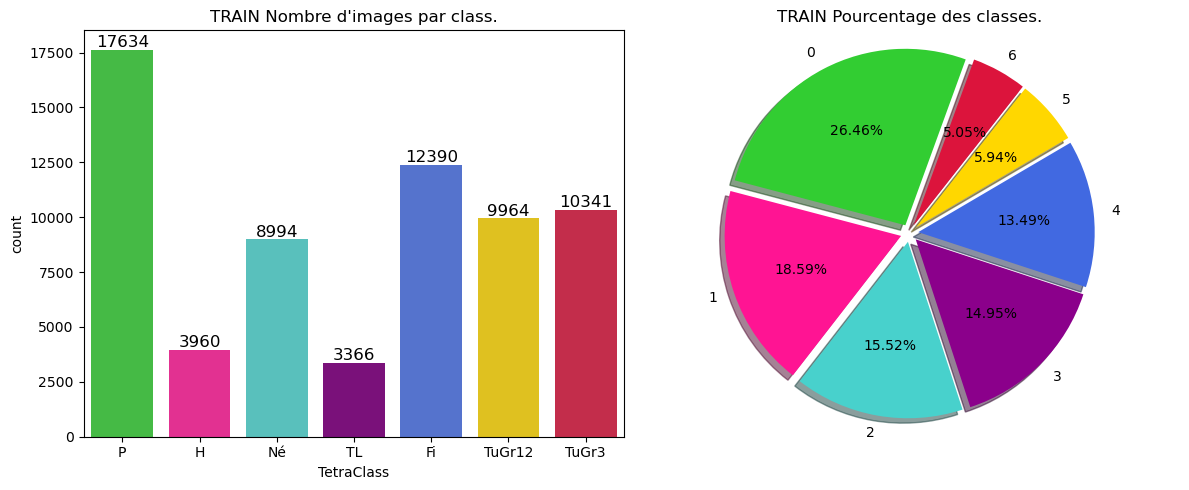

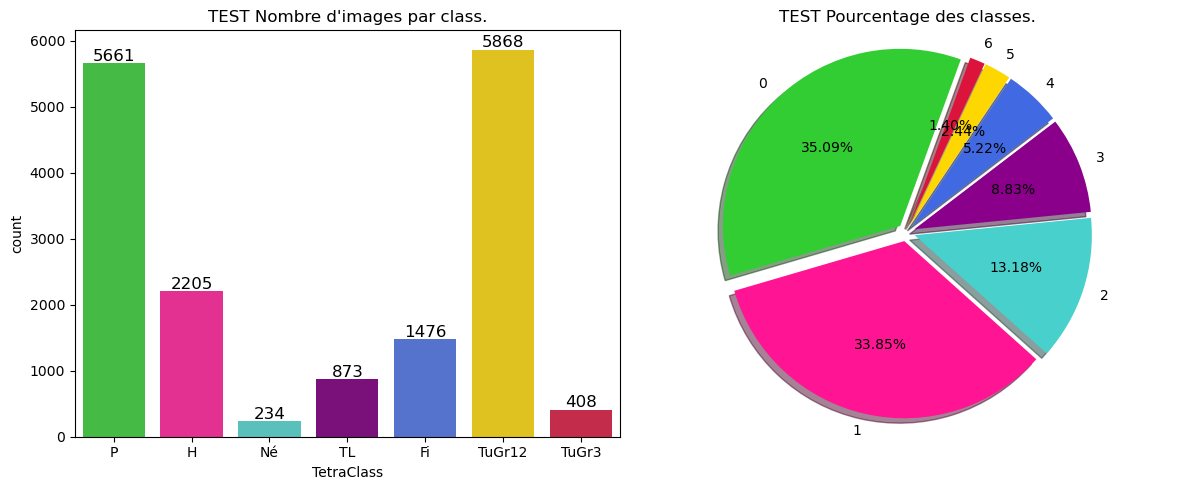

In [17]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df.loc[df['dataset']=='train'], x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("TRAIN Nombre d'images par class.")

plt.subplot(122)
sizes = [df.loc[df['dataset']=='train']["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('TRAIN Pourcentage des classes.')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(df.loc[df['dataset']=='test'], x='TetraClass', palette=colors)
ax = plt.gca()
for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("TEST Nombre d'images par class.")

plt.subplot(122)
sizes = [df.loc[df['dataset']=='test']["TetraClass"].value_counts()[val] for val in idx_to_label.values()]
plt.pie(sizes, explode=explode, labels=list(idx_to_label.values()), colors=colors,  autopct='%1.2f%%', shadow=True, startangle=70)             
plt.axis('equal')
plt.title('TEST Pourcentage des classes.')
plt.tight_layout()
plt.show()